<a href="https://colab.research.google.com/github/Catifode/Catifode/blob/main/Coding_Task_Chang_Zhao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/MyDrive/xray_images/

/content/drive/MyDrive/Coding Task_Chang Zhao


In [18]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [19]:
ROOT_DIR = "/content/drive/MyDrive/xray_images/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "/content/all_images/"

In [20]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")

    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)

else:
  print("Already Exist")

Already Exist


In [21]:
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 3616, 'Lung_Opacity': 6012, 'Normal': 10192, 'Viral Pneumonia': 1345}

In [23]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")


  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")


  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")



  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)


  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)


  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [24]:
train_path  = "/content/all_images/train_test_split/train"
valid_path  = "/content/all_images/train_test_split/validation"
test_path   = "/content/all_images/train_test_split/test"

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input, ResNet50
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [26]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [27]:
validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [29]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 800 images belonging to 2 classes.


In [30]:
class_type = {0:'Covid',  1 : 'Normal'}

In [31]:
t_img , label = train.next()

In [32]:
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

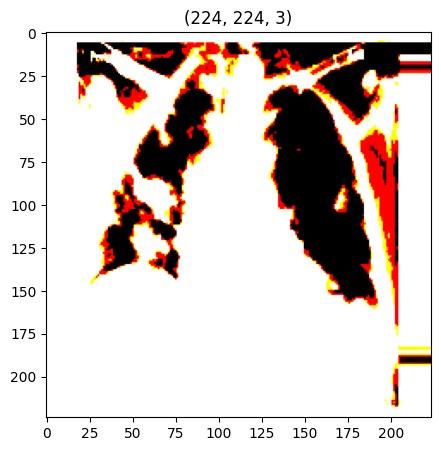

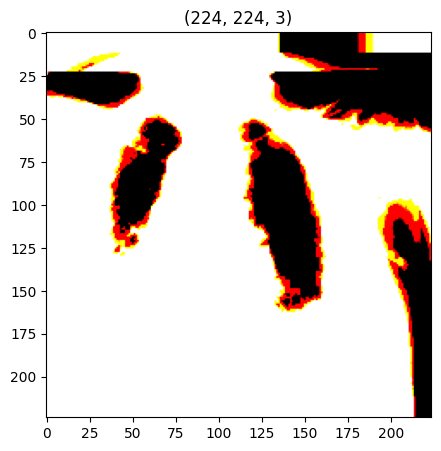

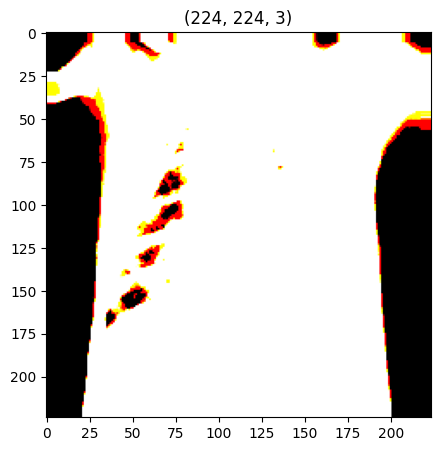

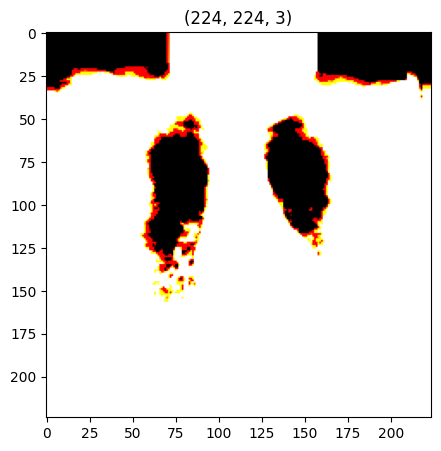

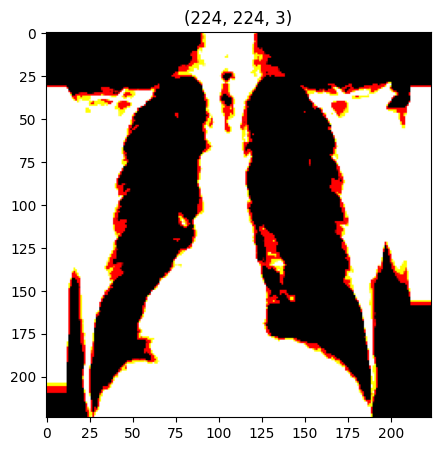

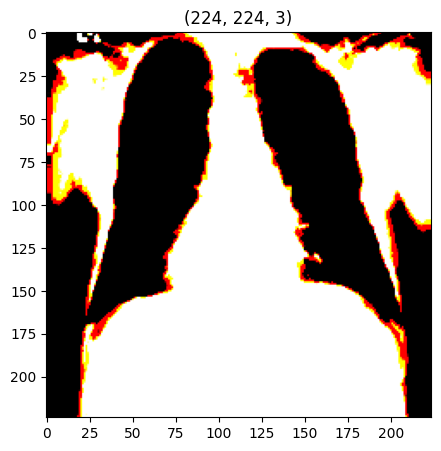

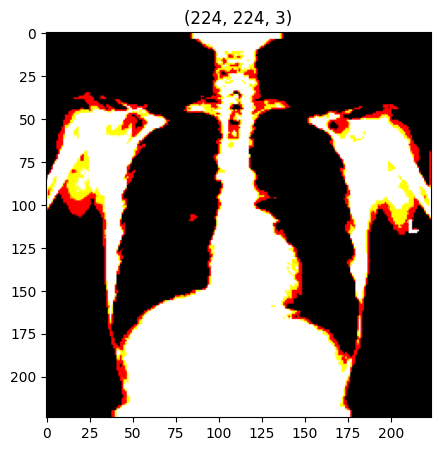

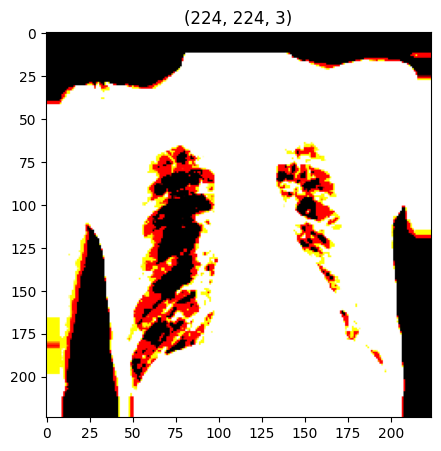

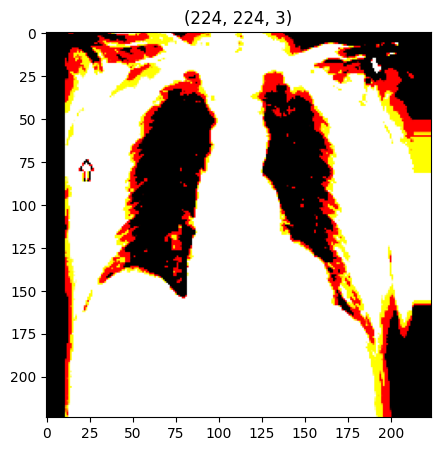

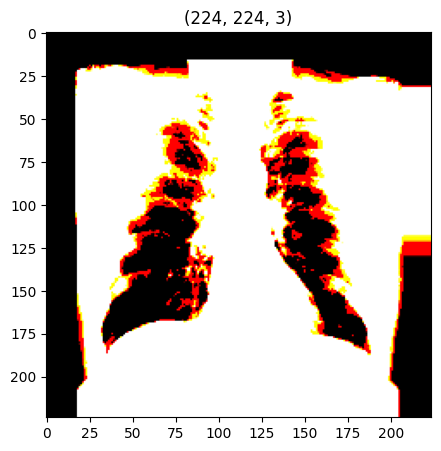

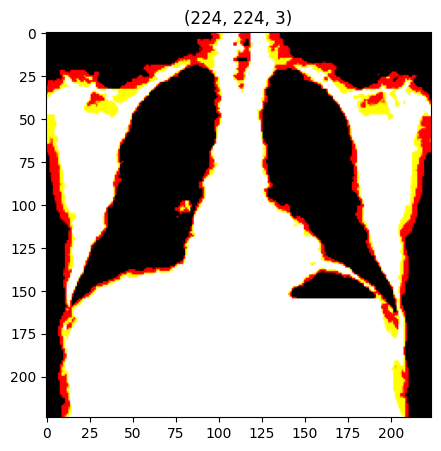

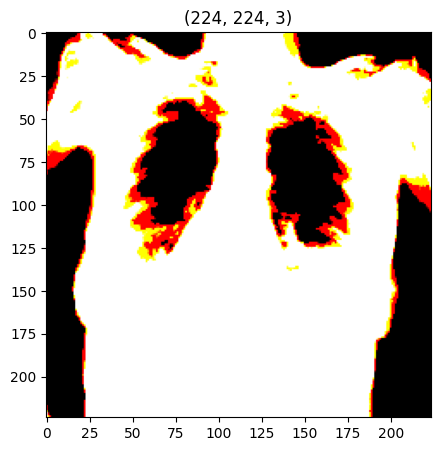

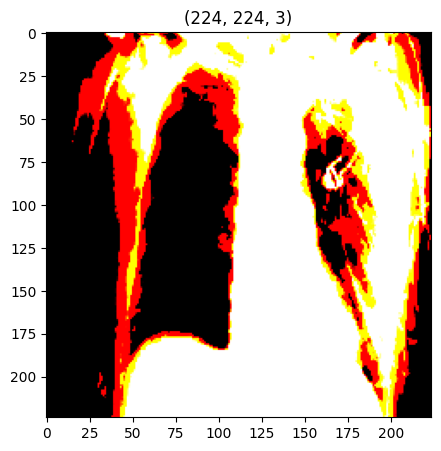

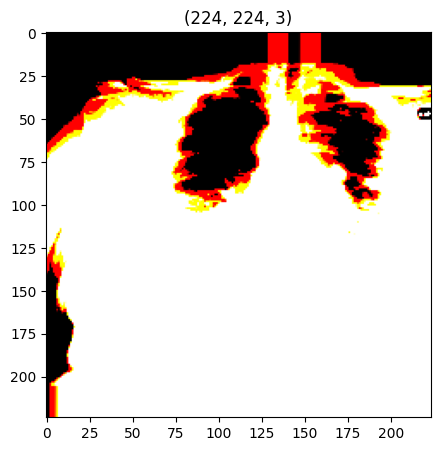

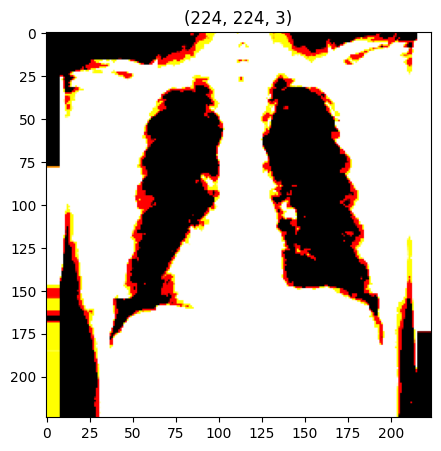

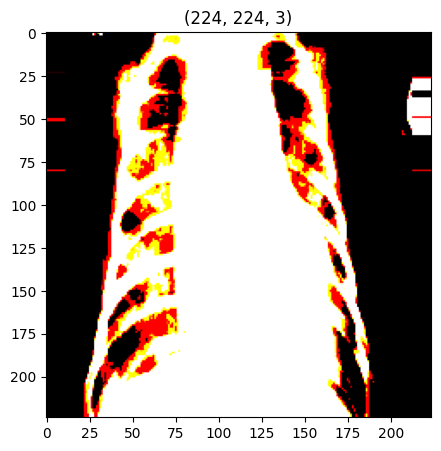

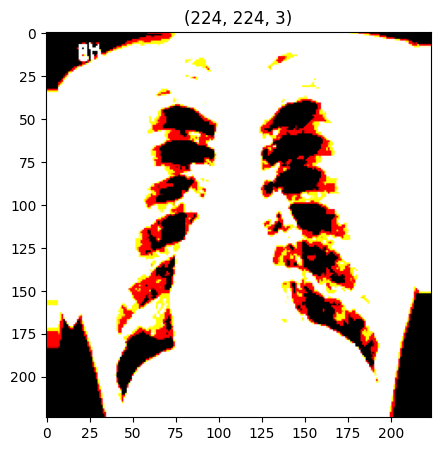

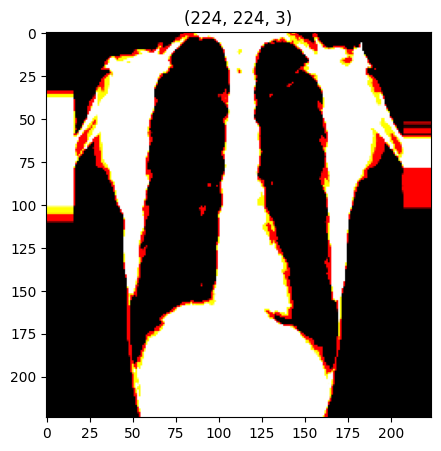

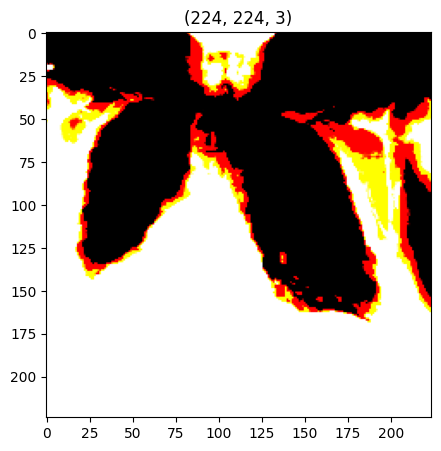

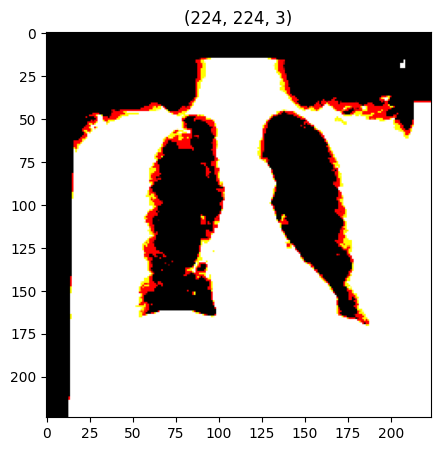

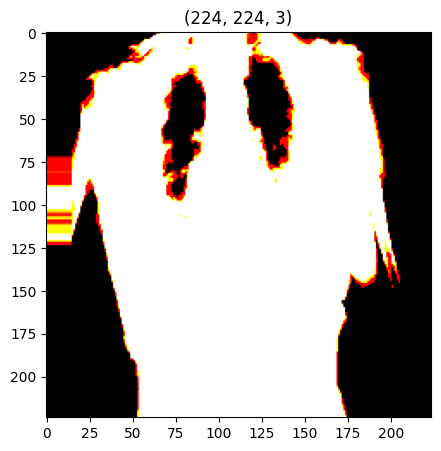

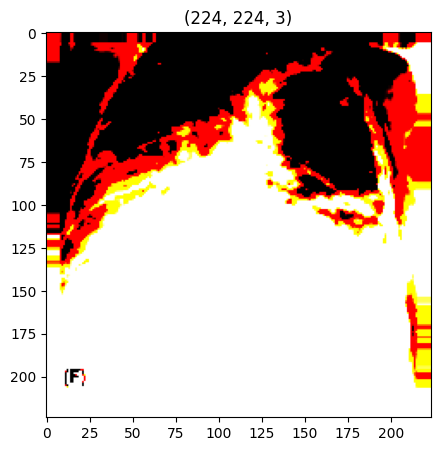

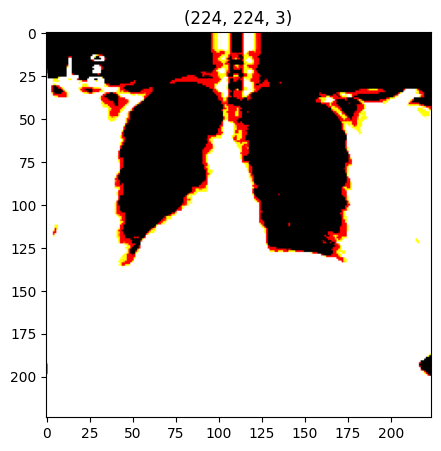

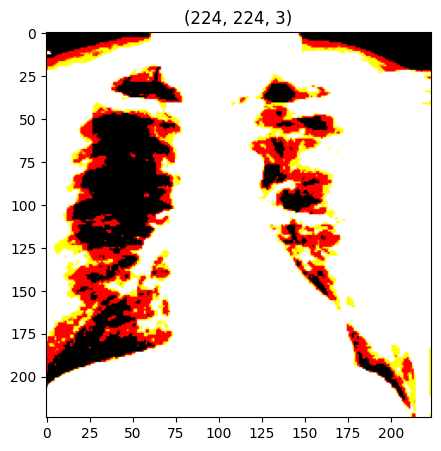

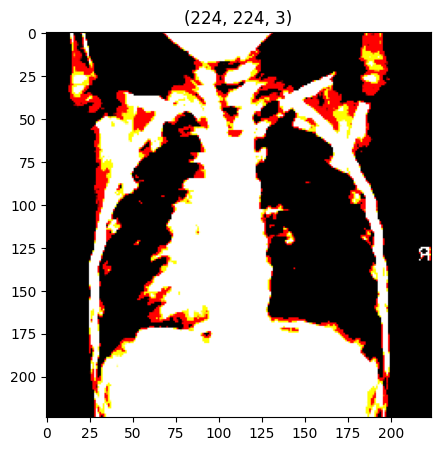

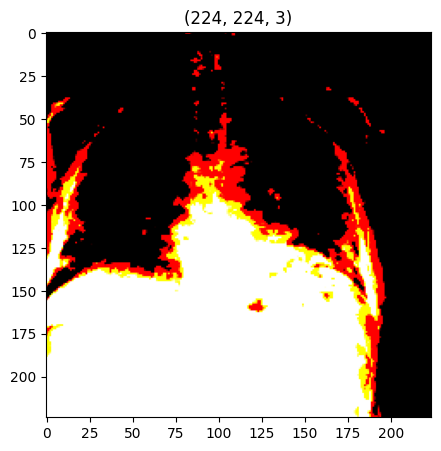

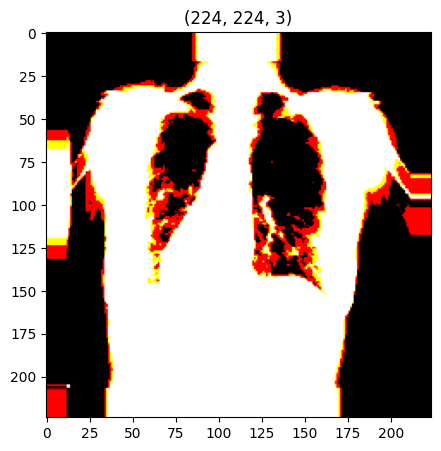

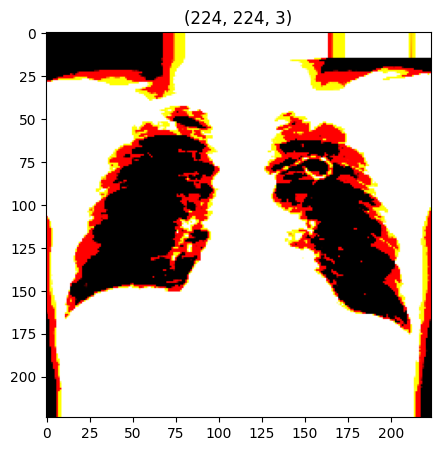

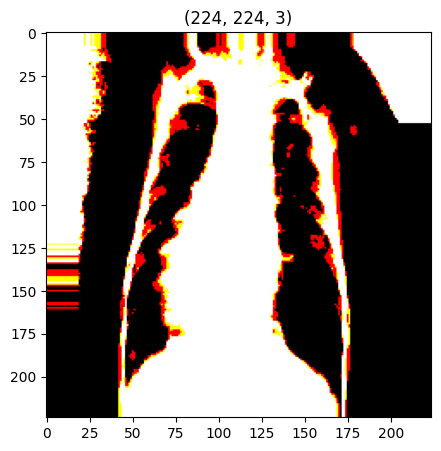

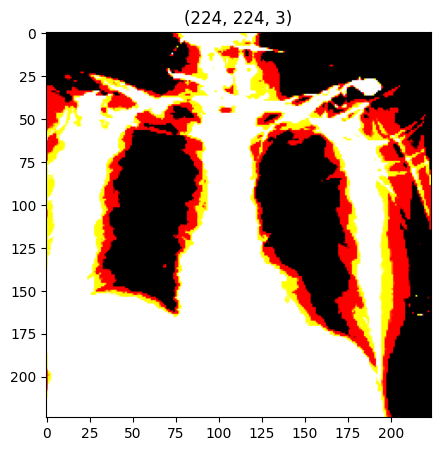

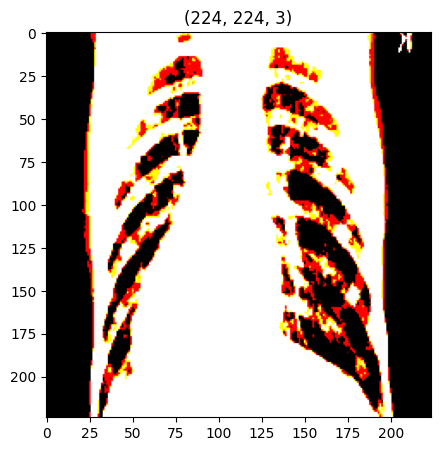

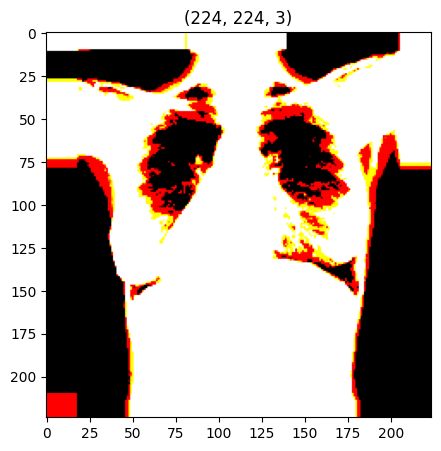

In [33]:
plotImages(t_img, label)

In [34]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [35]:
res = ResNet50( input_shape=(224,224,3), include_top= False)

94765736/94765736 [==============================] - 4s 0us/step


In [36]:
for layer in res.layers:
  layer.trainable = False

In [38]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)


model = Model(res.input, x)

In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [40]:
model.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [42]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])

<ipython-input-42-673b6a6f7538>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 16, callbacks=[es,mc])


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 4.0931 - accuracy: 0.6719
Epoch 1: val_accuracy improved from -inf to 0.80859, saving model to bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 237s 25s/step - loss: 4.0931 - accuracy: 0.6719 - val_loss: 3.1976 - val_accuracy: 0.8086
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 4.6872 - accuracy: 0.7656
Epoch 2: val_accuracy improved from 0.80859 to 0.86133, saving model to bestmodel.h5
10/10 [==============================] - 187s 20s/step - loss: 4.6872 - accuracy: 0.7656 - val_loss: 2.3173 - val_accuracy: 0.8613
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 3.8766 - accuracy: 0.8031
Epoch 3: val_accuracy did not improve from 0.86133
10/10 [==============================] - 215s 23s/step - loss: 3.8766 - accuracy: 0.8031 - val_loss: 3.0421 - val_accuracy: 0.8418
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 2.6726 - accuracy: 0.8531
Epoch 4: val_accuracy improved from 0.86133 to 0.88477, saving model to bestmodel.h5
10/10 [==============================] - 219s 23s/step - loss: 2.6726 - accuracy: 0.8531 - val_loss: 1.5

In [43]:
from keras.models import load_model
model = load_model("bestmodel.h5")


In [48]:
acc = model.evaluate(test)[1]

print(f"The accuracy of your model is = {acc} %")

25/25 [==============================] - 180s 7s/step - loss: 1.7733 - accuracy: 0.8875
The accuracy of your model is = 0.887499988079071 %


In [49]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

1/1 [==============================] - 0s 304ms/step
The given X-Ray image is of type = Normal

1/1 [==============================] - 0s 360ms/step
The chances of image being Covid is : 2.0037222991931003e-07 percent

1/1 [==============================] - 0s 361ms/step
The chances of image being Normal is : 100.0 percent


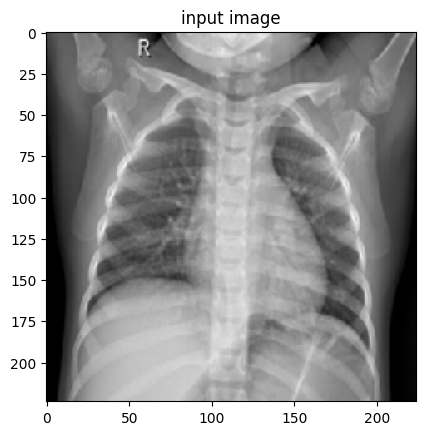

In [52]:
path = "/content/all_images/Normal-86.png"

img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()